# Fig 5: Comparison of mean-squared displacement to models with division noise

The key conclusion at this point is that the simple model perserves the statistics the GP output. Can we reject H1: The data is from the OU model + trend? Our test statisic is  $$\hat{T}=  MSD-0.5.$$

We can estimate $$P(T>\hat{T}|H_1)$$ where


We obtain the sample distribution of $\hat{T}$ numericaly for a two parameter class of models, which interpolates between the pure OU model, constant per cell-cycle and jump with exponential relaxation. These captures models from previous studies.

# Setup and Load data

In [20]:
using CSV
using DataFrames
using Distributions
using StatsBase
using PythonPlot
using Random
using Tables
using DifferentialEquations
include("./../src/GrowthTraceTools.jl")
using .GrowthTraceTools
cd(dirname(@__FILE__))

In [21]:
data_gp = CSV.read("./../output/gp_8-30-24/preds.csv",DataFrame)
data_gp = data_gp[data_gp .> ]
lineages = unique(data_gp.lineage)

24-element Vector{Float64}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0
  ⋮
 16.0
 17.0
 18.0
 19.0
 20.0
 21.0
 22.0
 23.0
 24.0

In [18]:
function MSD(x,max_steps)
    n = length(x)
    msd = zeros(max_steps)
    for i in 1:max_steps 
        msd[i] = mean((x[1:end-i] .- x[i+1:end]).^2)
    end
    return msd
end

MSD (generic function with 1 method)

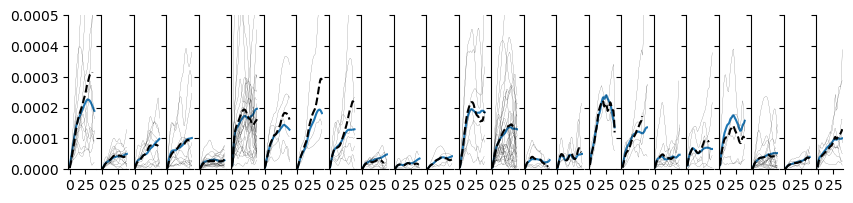

In [19]:
fig,axs = subplots(figsize=(10,2),ncols = length(lineages),sharex=true,sharey=true)

for k in eachindex(lineages)
    ax = axs[k-1]
    df = data_gp[data_gp.lineage .== lineages[k],:]
    x = df.matern32_flucs_x
    msdx = MSD(x,40)
    ax.plot(msdx)
    mw = []
    for p in unique(df.position)
        xw = df[df.position .==p,:matern32_flucs_x]
        y = MSD(xw,40)
        push!(mw,y)
        ax.plot(y,"k-",lw=0.1)
    end
    mw = hcat(mw...)
    μ = mean(mw,dims=2)
    ax.plot(μ,"k--")
    v = var(mw,dims=2)
   # ax.fill_between(collect(1:length(μ)),μ[1] .- v[1],μ[1])
    ax.set_ylim([0.,0.0005])
    ax.spines["right"].set_visible(false)
    ax.spines["top"].set_visible(false)
end
savefig("./../figures/MSD.pdf")
fig

In [ ]:
xw = df[df.position .==2,:matern32_flucs_x]
mw = MSD(xw,20)

xb = df[:,:matern32_flucs_x]
mw = MSD(xw,20)